<a href="https://colab.research.google.com/github/tiwariaman01/Data_analysis/blob/main/Customer_charn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Analysis**

dataset info : Sample data set Containing customer data and showing customers left last month .

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

load the data file


In [ ]:
df = pd.read_csv('/content/CustomerChurn.csv')

look at the 5 records of data


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


check the various attributes of data file , like data shape ,columns, datatypes etc.


check the columns of the data set




In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

check the datatypes of columns

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

there is only two columns those value considered int and float or numbers. (tenure and total charges)

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


there is no null value in data .


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

most of columns datatypes or values are object.

In [ ]:
# check the discriptive statistic of numeric variables

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


senior citizen is not numeric data or columns ,therefore 25% - 50% - 75% -100% distribution is not appear


75% customer have tenure less than 55 months

monthtly average charges of customer are 64 USD per month . and 25% of customer pay more than 89 USD per month

In [ ]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

73% of customer has not churn from company
26% of customer has been left from company , which mean total churn rate of company is 26.5%

Text(0.5, 1.02, 'count of target variable per category')

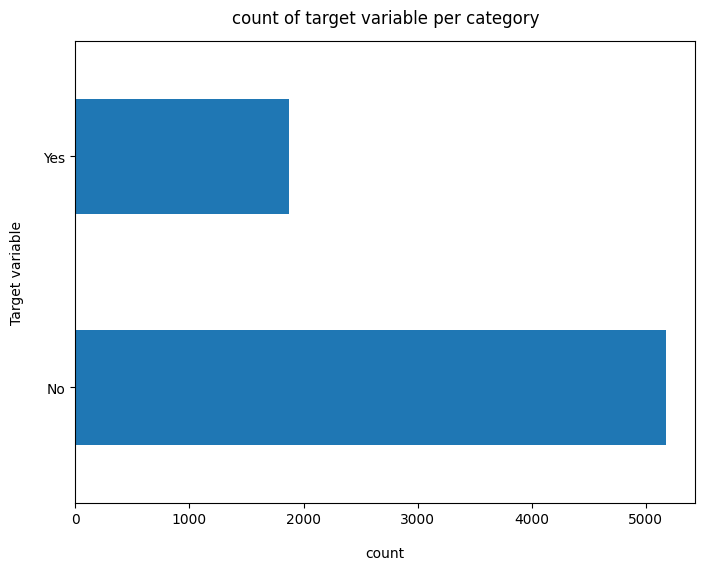

In [ ]:
df['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("count",labelpad=14)
plt.ylabel("Target variable",labelpad=14)
plt.title('count of target variable per category',y=1.02)




*   Data is highly imbalanced, ratio = 73.27

*   so we analysis the data with other features while taking the target values separtely to get some insights.



In [ ]:
# consise the summary of the dataframe, as we have too many columns , we are using he verbose = Ture mode

df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


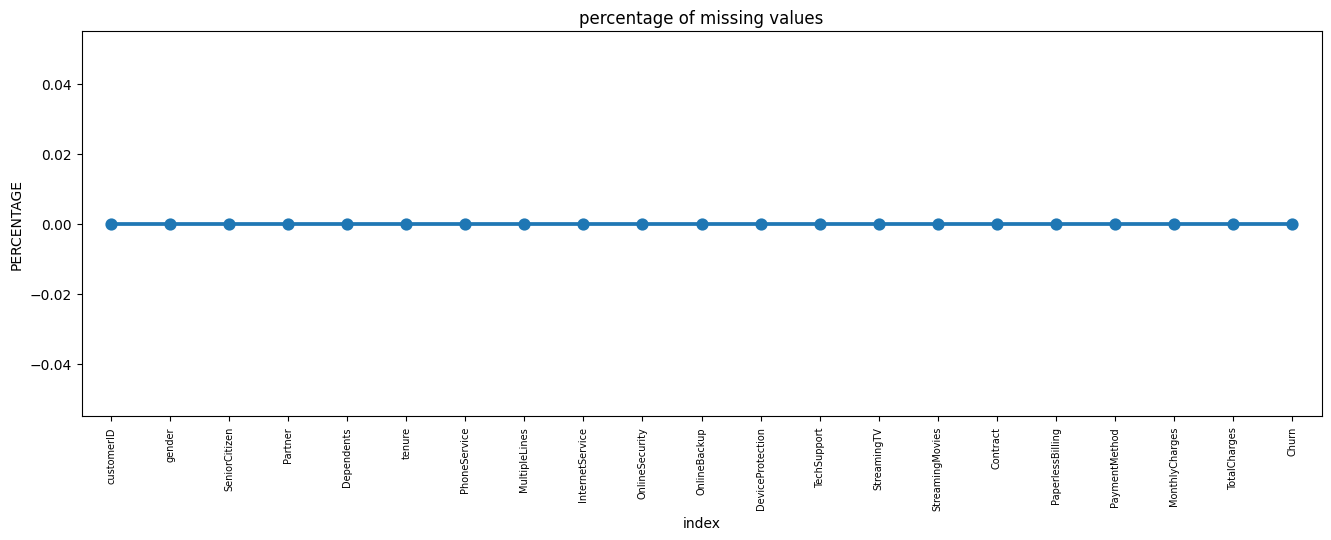

In [ ]:
from re import X
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0,data = missing)
plt.xticks(rotation= 90 ,fontsize =7)
plt.title('percentage of missing values')
plt.ylabel('PERCENTAGE')
plt.show()

**Missing data - Initial Intuition**


*  Here, we don't have any misssing value in data set.

  







** Data cleaning  **





*   create of copy of base data fot manupulation & processing








In [ ]:
new_df = df.copy()

total charges should be  numerice amount. let's convert it to numerical data type

In [ ]:
new_df['TotalCharges'] = pd.to_numeric(new_df['TotalCharges'],errors='coerce')

new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As i can see that , there is 11 missing values in Total Charges  columns. Let's check these records

In [ ]:
new_df.loc[new_df['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**missing treatment **

since the percentage of the records compared to total dataset is very low ie 0.15%. it is safe to ignore them from further processing.


In [ ]:
# Revoming all the missing value
new_df.dropna(how= 'any',inplace = True)

5.Divid customers into bins based on tenure  e.g for tenure < 12 ; assign a tenure group if 1 - 12 , for tenure between 1 to 2 yrs ,
tenure group 13-24 ; so on....

In [ ]:
print(new_df['tenure'].max())

72


In [ ]:
labels = ["{0} - {1}" .format(i ,i + 11)for i in range(1,72,12)]

print(labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [ ]:
# Group tenure in bins of 12 months
labels = ["{0} - {1}" .format(i ,i + 11)for i in range(1,72,12)]


new_df['tenure_group'] = pd.cut(new_df.tenure ,range(1,80,12), right = False,labels= labels)

new_df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

Remove the columns not requried for processing

In [ ]:
new_df.drop(columns = ['customerID','tenure'],axis = 1 , inplace=True)



In [ ]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


**Data Exploration**

plot distibution of individual predictors by churn

**Univariant analysis**

In [ ]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


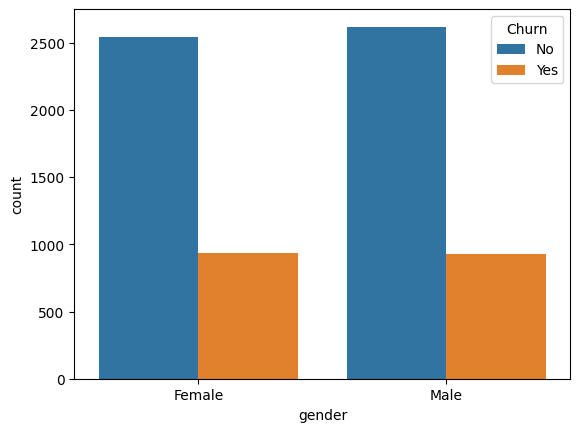

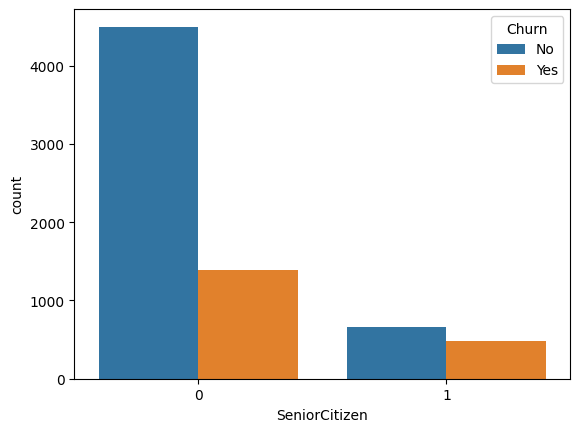

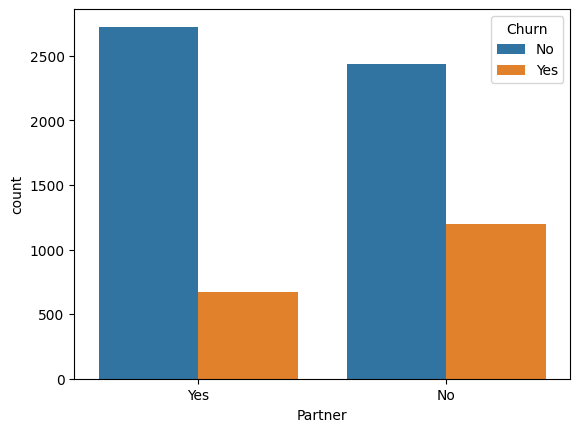

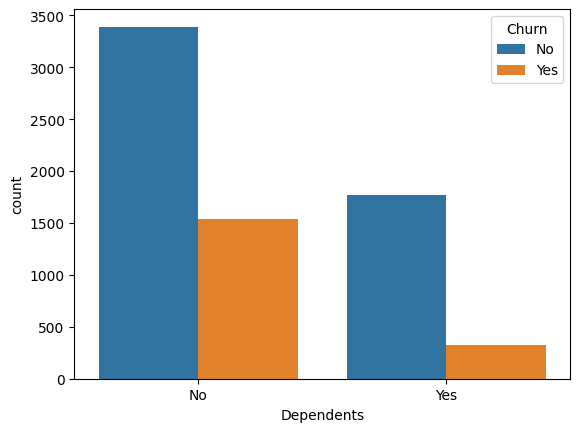

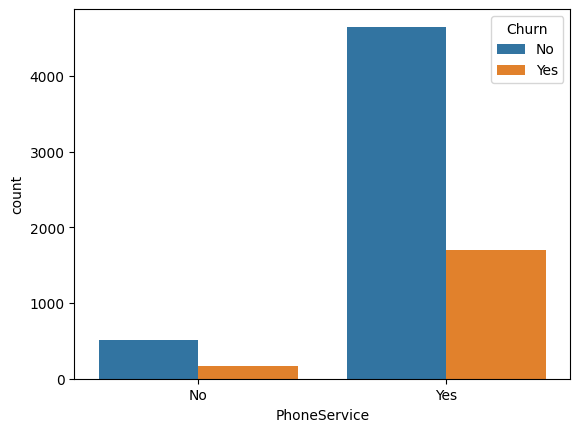

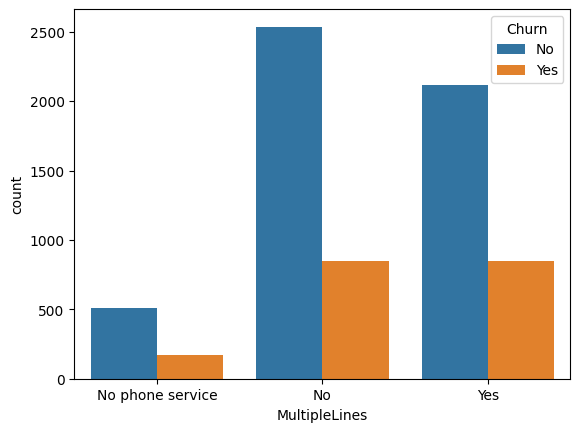

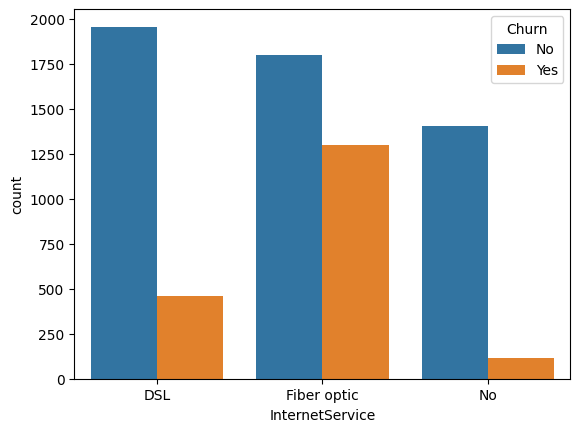

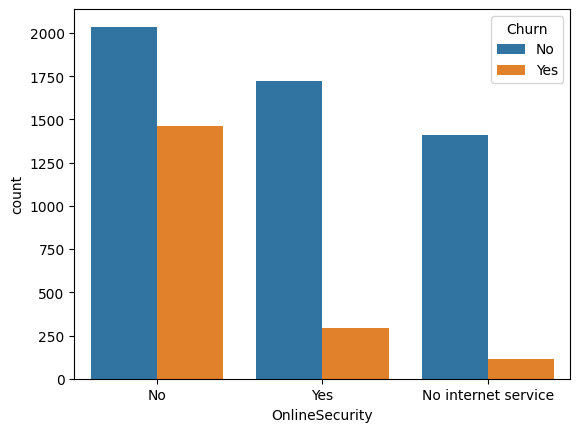

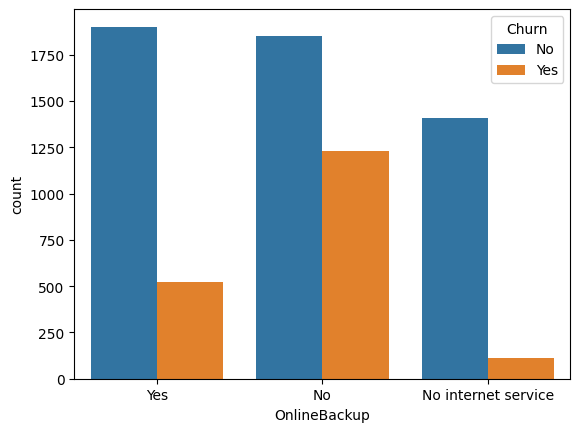

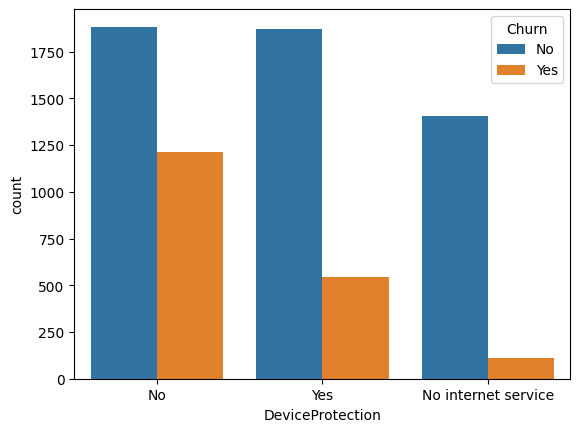

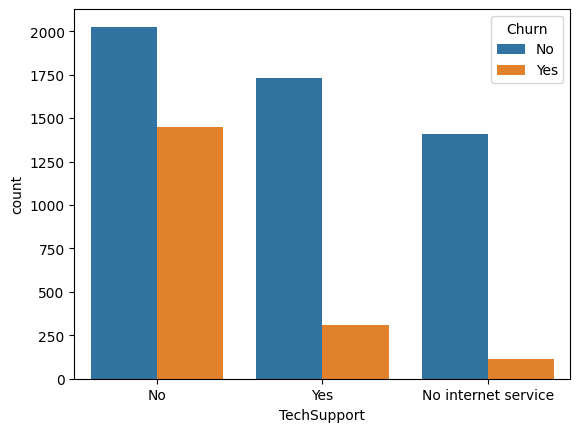

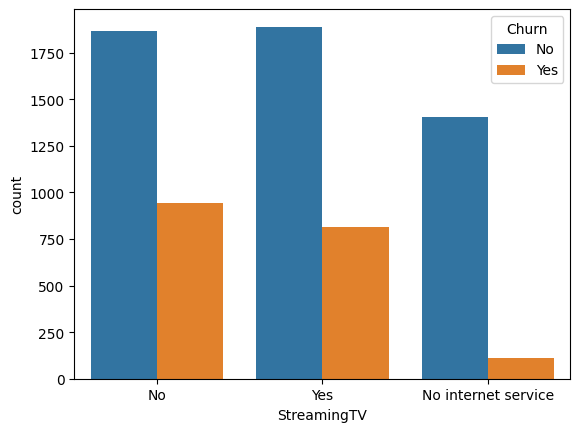

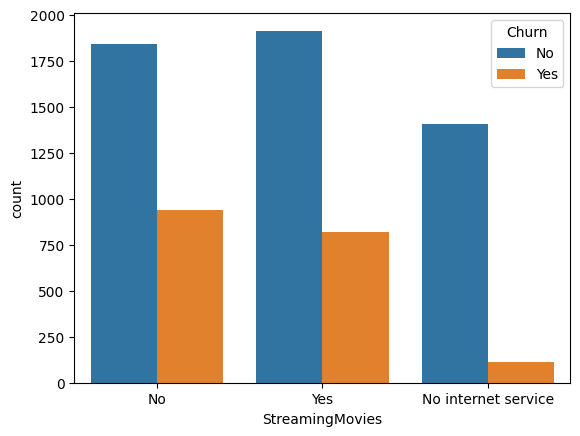

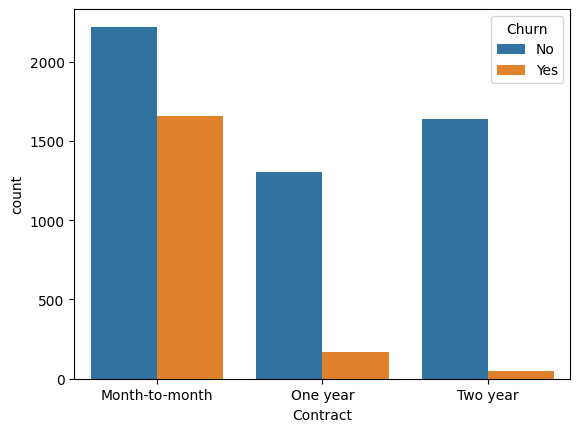

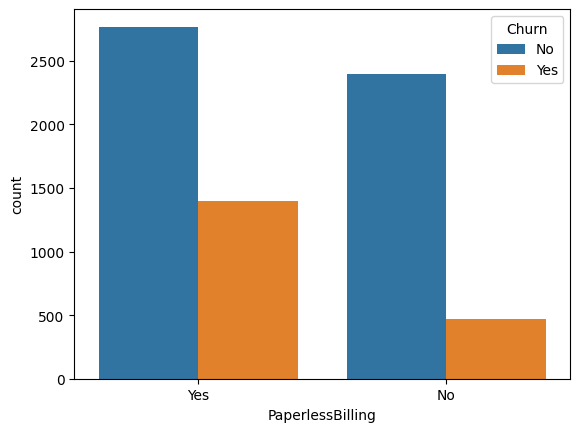

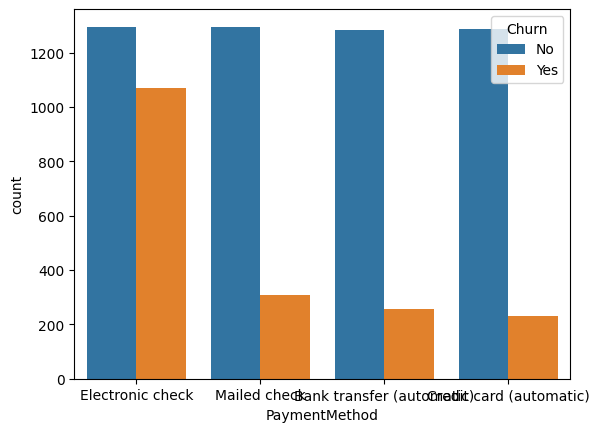

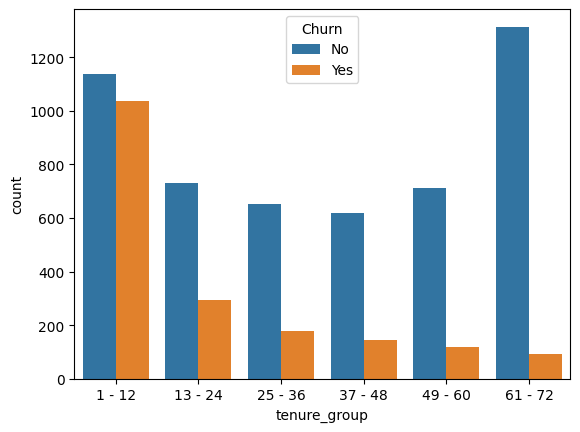

In [ ]:
for i, predictor in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df,x=predictor,hue='Churn')



*   Senior citizen more likely to churn than non- senior citizen
*   Around 35% churn those does not have partner
*   monthly churn more than yearly
*   in payment method , Electronic check have more churn than others payment method.



In [ ]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


**Numeric Analysis**

In [ ]:
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [ ]:
new_df1_target0 = new_df[new_df['Churn']=='No']
new_df1_target1 = new_df[new_df['Churn']=='Yes']

In [ ]:
new_df1_target1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,49 - 60


In [ ]:
new_df1_target1.gender.value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [ ]:
pd.crosstab(new_df.PaymentMethod,new_df.gender)

gender,Female,Male
PaymentMethod,,
Bank transfer (automatic),787,755
Credit card (automatic),751,770
Electronic check,1170,1195
Mailed check,775,829


convert target variable 'churn' into numerical binary for numerical analysis i.e 'Yes' == 1 and 'No' == 0

In [ ]:
new_df['Churn']= np.where(new_df.Churn == 'Yes',1,0)

In [ ]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Convert all categorical variable into dummy variabel for numerical analysis .

In [ ]:
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


Firstly, we analys Relationship between Monthly charges and Total charges

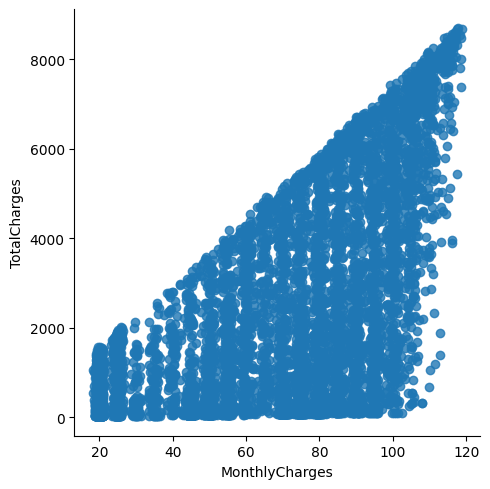

In [ ]:
sns.lmplot(data= new_df_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

In [ ]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6510648032262027

Relationship between monthlycharges and totalcharges is positive

<ipython-input-39-64e64cf6877a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']== 0)],
<ipython-input-39-64e64cf6877a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']== 1)],


Text(0.5, 1.0, 'Monthly Charges by churn')

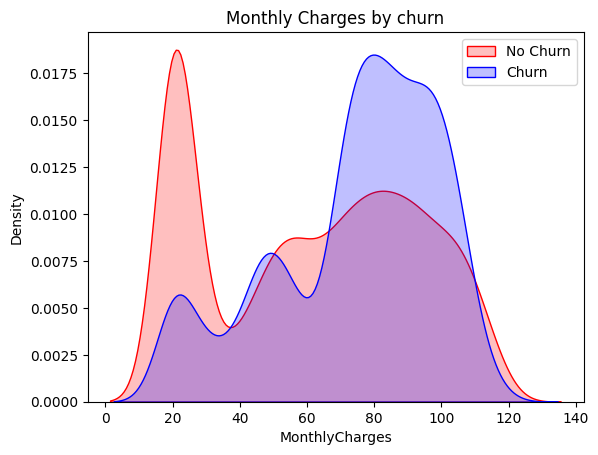

In [ ]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']== 0)],
                  color = 'Red' ,shade = True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']== 1)],
                  ax=Mth,color = 'Blue' ,shade = True)

Mth.legend(['No Churn','Churn'],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('MonthlyCharges')
Mth.set_title('Monthly Charges by churn')


**Insight** churn is very hight when monthly charges are high


<ipython-input-40-d3fcf03fe3ff>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tth= sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']== 0)],
<ipython-input-40-d3fcf03fe3ff>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tth = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']== 1)],


Text(0.5, 1.0, 'Total Charges by churn')

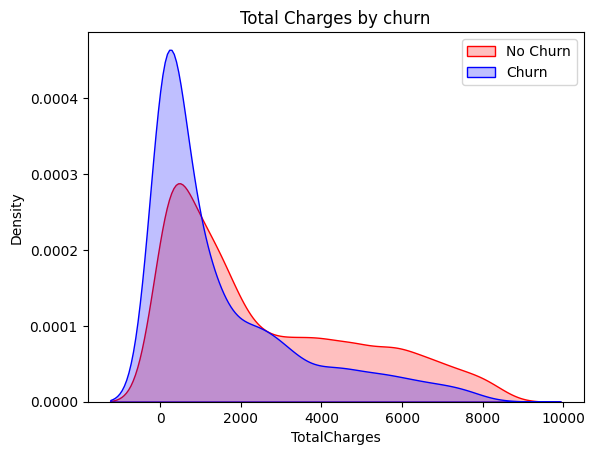

In [ ]:
Tth= sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']== 0)],
                  color = 'Red' ,shade = True)
Tth = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies['Churn']== 1)],
                  ax=Tth,color = 'Blue' ,shade = True)

Tth.legend(['No Churn','Churn'],loc='upper right')
Tth.set_ylabel('Density')
Tth.set_xlabel('TotalCharges')
Tth.set_title('Total Charges by churn')


** Insights ** surprising as higher churn at low Total Charges

However if combine the 3 insights of parameter i.e Tenure, Monthlycharges, TotalCharges then pictures is bit clear .

* bulid the corelation of all predictors with 'Churn'

<Axes: >

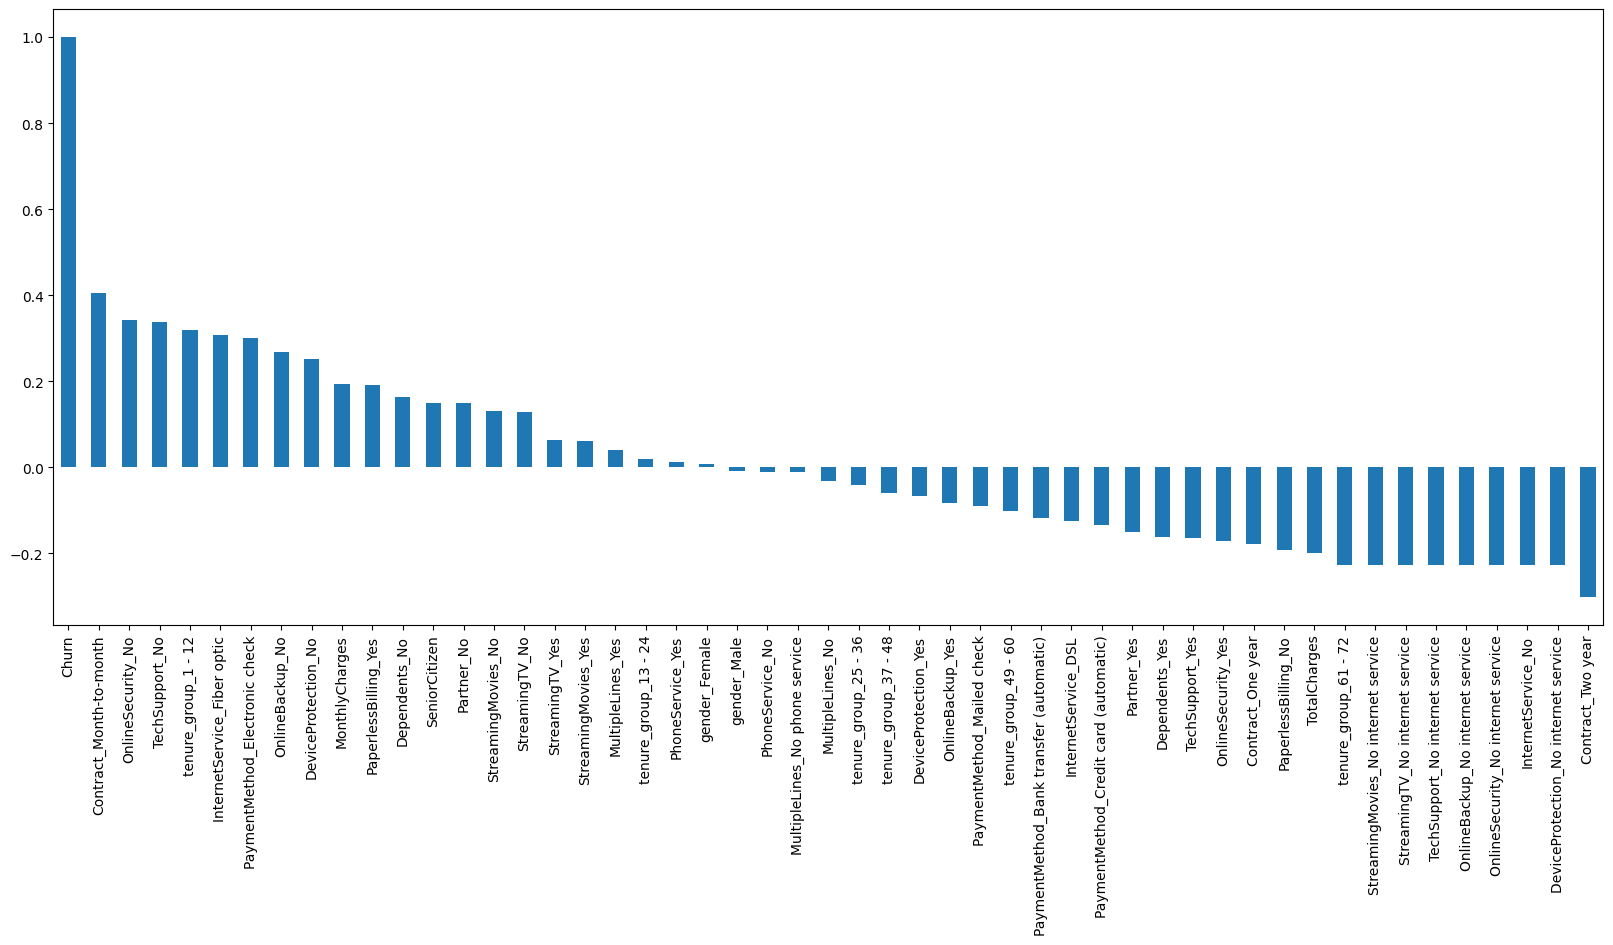

In [ ]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')



1.   contract month to month is churn
2.   onlinesecurity is cause of churn
3.   overall, all predictors above 0.2 are expected to cauese of churn of customer

4.  these predictors are month to month ,onlinesecurity,teachsupport,tenure,internetservice ,paymentmethod,deviceprotection,monthlycharges




<Axes: >

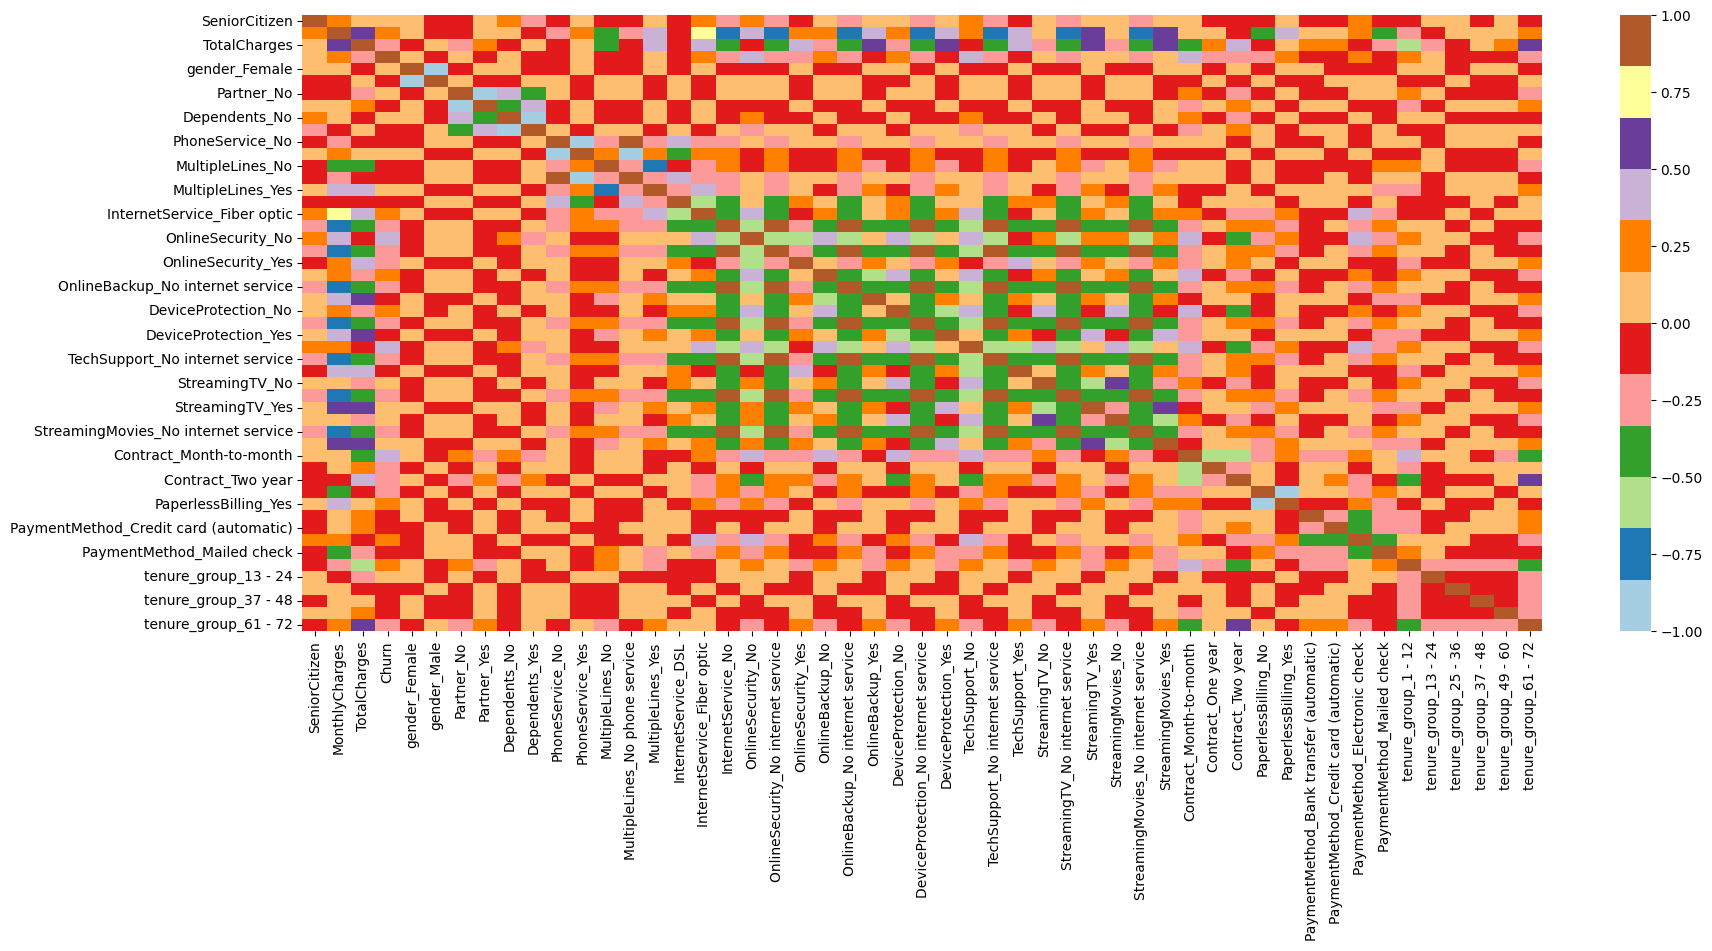

In [ ]:
plt.figure(figsize =(20,8))
sns.heatmap(new_df_dummies.corr(),cmap='Paired')

**Biveriate analysis**


In [ ]:
new_df_target0= new_df.loc[new_df['Churn']==0]
new_df_target1= new_df.loc[new_df['Churn']==1]

In [ ]:
len(new_df1_target0)

5163

In [ ]:
len(new_df1_target1)

1869

In [ ]:
new_df1_target1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [ ]:
def uniplot(df,col,title,hue=None):

  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams['axes.labelsize']= 20
  plt.rcParams['axes.titlesize']= 22
  plt.rcParams['axes.titlepad']= 30

  temp =pd.Series(data = hue)
  fig,ax = plt.subplots()
  width =len(df[col].unique()) + 7 + 4 *len(temp.unique())
  fig.set_size_inches(width,8)
  plt.xticks(rotation = 45)

  plt.title(title)
  ax = sns.countplot(data=df,x= col ,order=df[col].value_counts().index, hue=hue,palette='bright')

  plt.show()

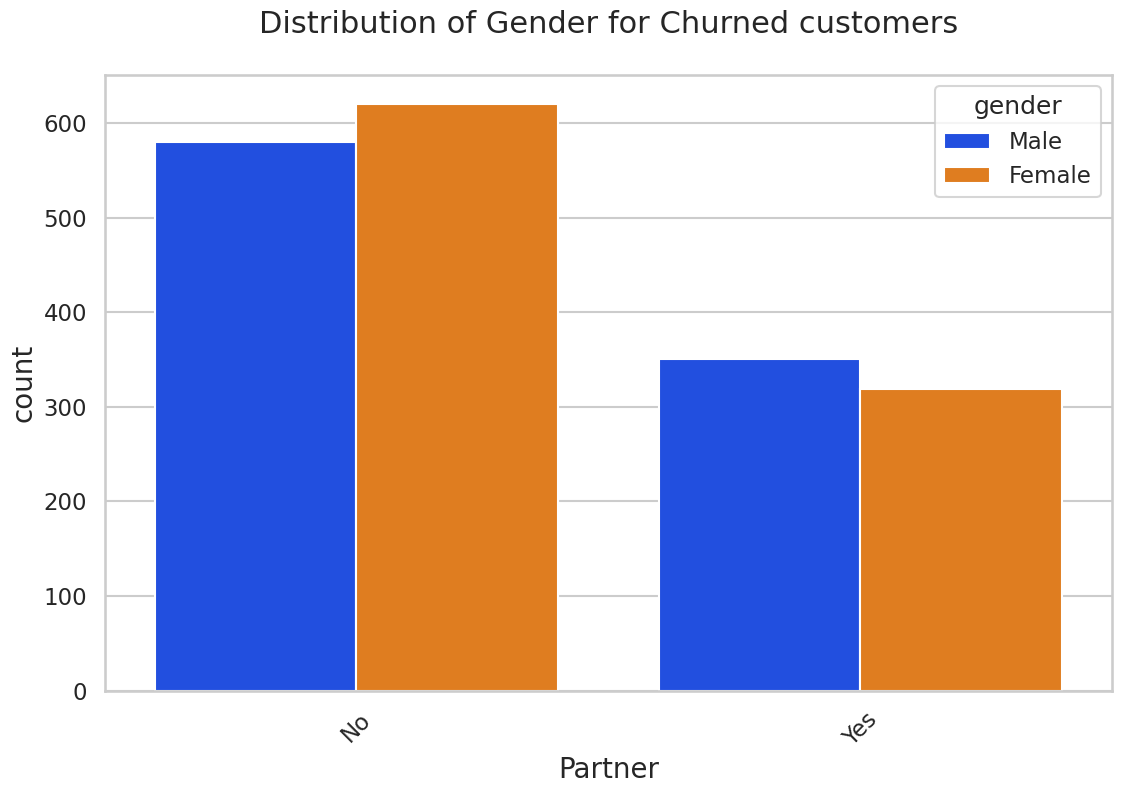

In [ ]:
uniplot(new_df_target1, col='Partner' , title ='Distribution of Gender for Churned customers' ,hue = 'gender')

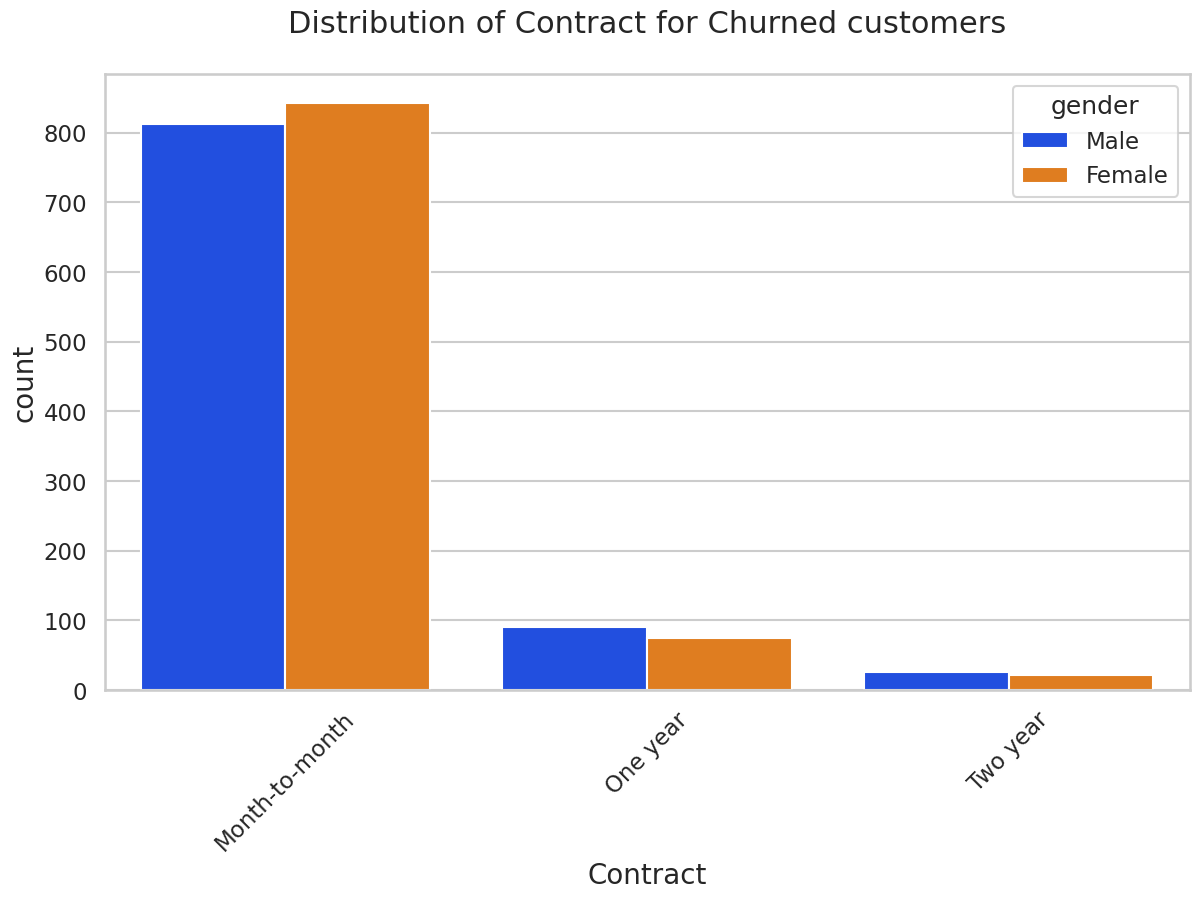

In [ ]:
uniplot(new_df_target1, col='Contract' , title ='Distribution of Contract for Churned customers' ,hue = 'gender')

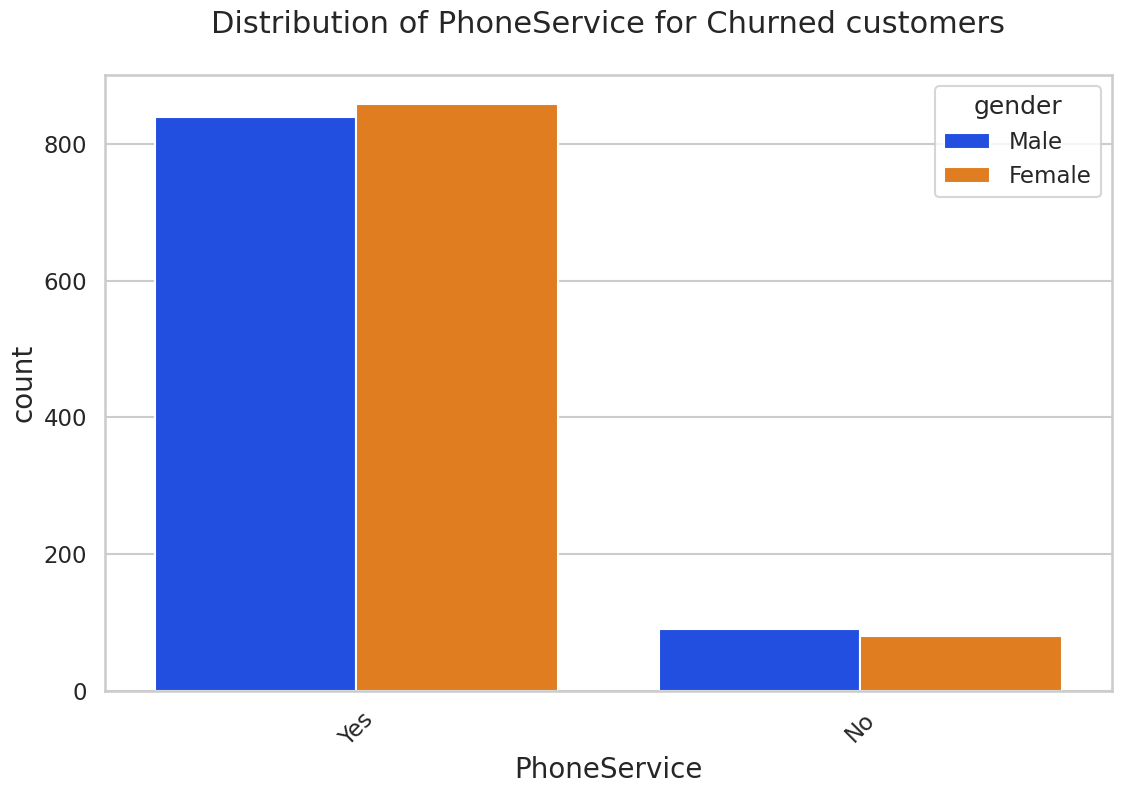

In [ ]:
uniplot(new_df_target1, col='PhoneService' , title ='Distribution of PhoneService for Churned customers' ,hue = 'gender')

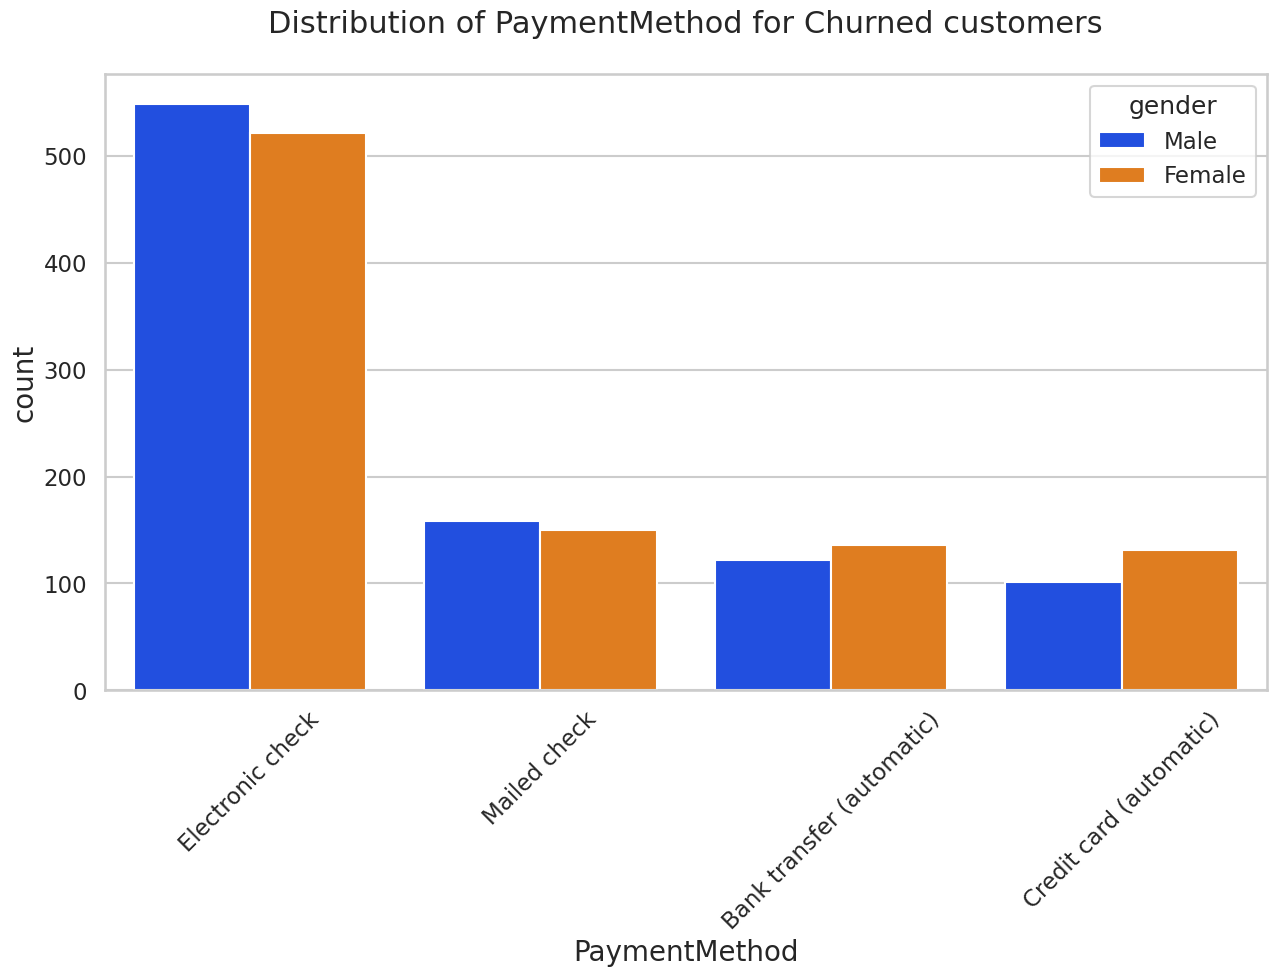

In [ ]:
uniplot(new_df_target1, col='PaymentMethod' , title ='Distribution of PaymentMethod for Churned customers' ,hue = 'gender')

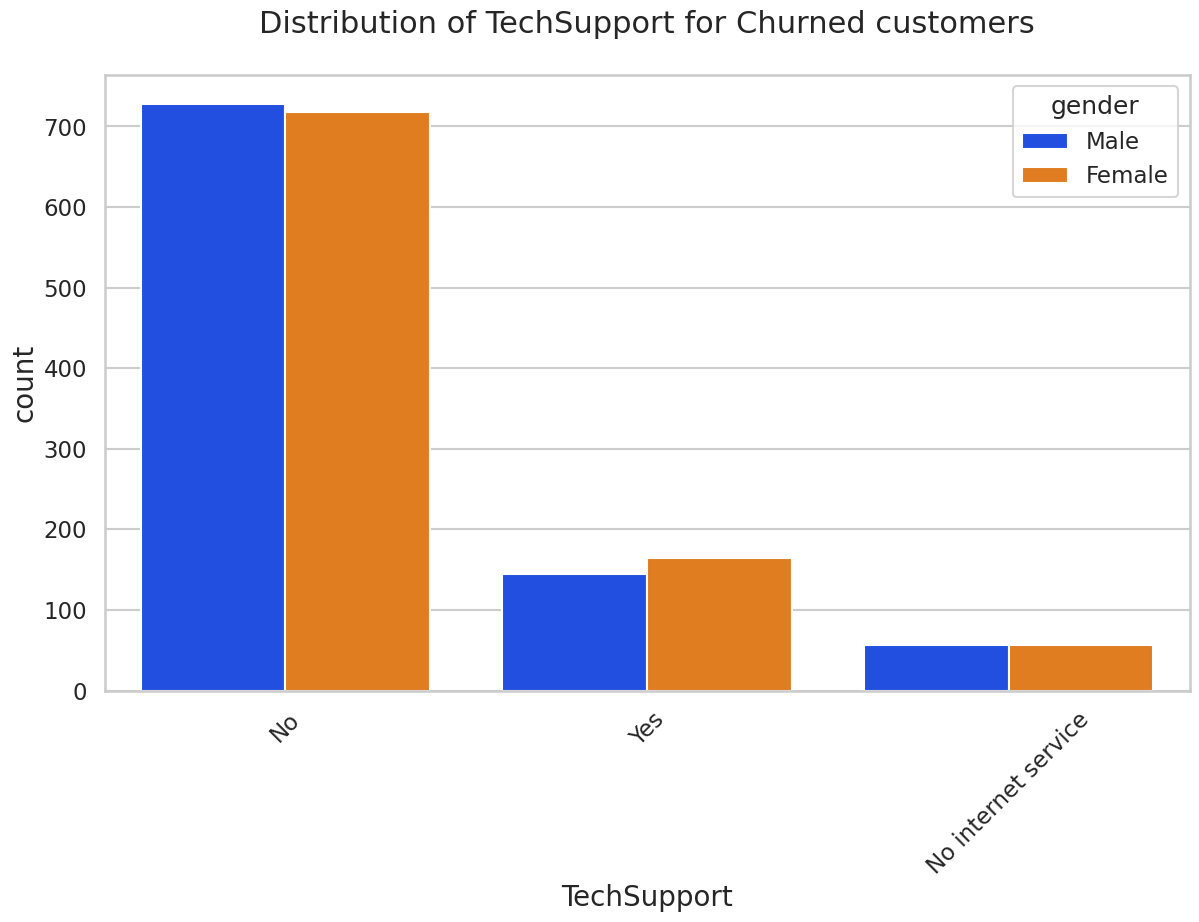

In [ ]:
uniplot(new_df_target1, col='TechSupport' , title ='Distribution of TechSupport for Churned customers' ,hue = 'gender')